In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,recall_score,precision_score

In [2]:
df = pd.read_csv('data.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
df.isnull().value_counts()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  lips_thin  distance_nose_to_lip_long  gender
False      False              False               False      False      False      False                      False     5001
dtype: int64

In [4]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [6]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

In [7]:
df.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,-0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,-0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,-0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,-0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,-0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,-0.754850
gender,0.010767,-0.334125,-0.277190,-0.758502,-0.744147,-0.743319,-0.754850,1.000000


<AxesSubplot: >

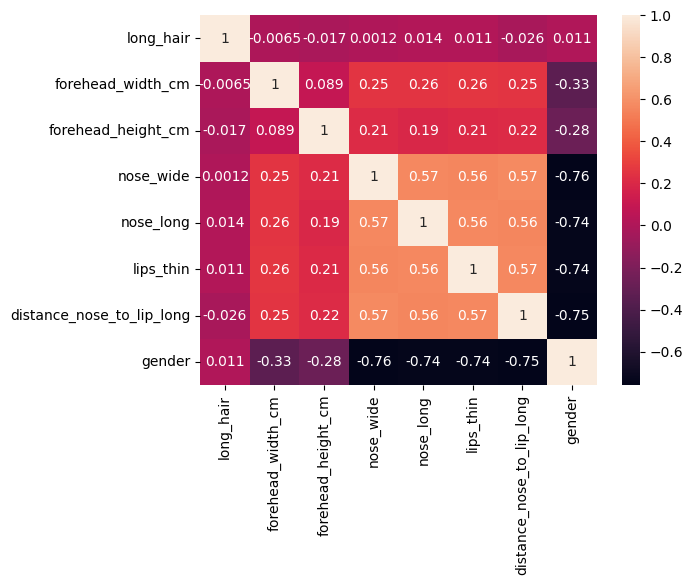

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.corrwith(df['gender']).sort_values()

nose_wide                   -0.758502
distance_nose_to_lip_long   -0.754850
nose_long                   -0.744147
lips_thin                   -0.743319
forehead_width_cm           -0.334125
forehead_height_cm          -0.277190
long_hair                    0.010767
gender                       1.000000
dtype: float64

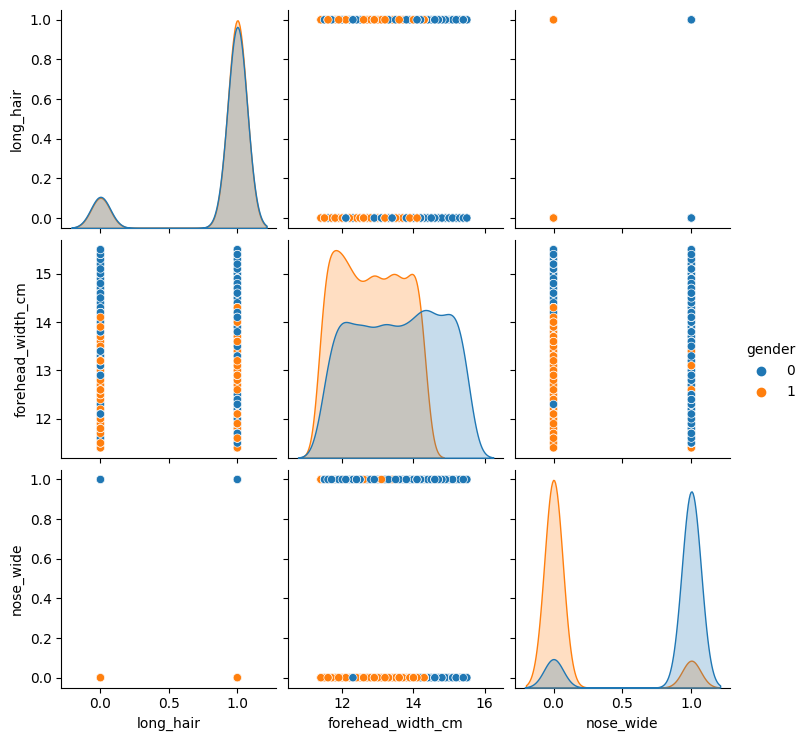

In [10]:
sns.pairplot(df[['long_hair','forehead_width_cm','nose_wide','gender']], hue ='gender')
plt.show()

In [11]:
x = df[['nose_wide','distance_nose_to_lip_long','nose_long','lips_thin']]
y = df['gender']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [13]:
linear_classifier = SGDClassifier()
linear_classifier.fit(x_train, y_train)
y_pred = linear_classifier.predict(x_test)

In [14]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("Precision:",recall_score(y_test,y_pred))
print("F1:",f1_score(y_test,y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.957042957042957
Recall: 0.9662698412698413
Precision: 0.9662698412698413
F1: 0.9577187807276303
Confusion matrix:
 [[471  26]
 [ 17 487]]


In [15]:
"Male" if linear_classifier.predict([[1,1,0,1]])[0]==0 else "Female"

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


'Male'